In [40]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNSIT Data

In [41]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

In [42]:
# Extract features and labels
X, y = mnist['data'], mnist['target']

In [43]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [45]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [46]:
X.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [47]:
X.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [48]:
# Convert data to float64 and labels to integers
X = X.astype('float64')
y = y.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


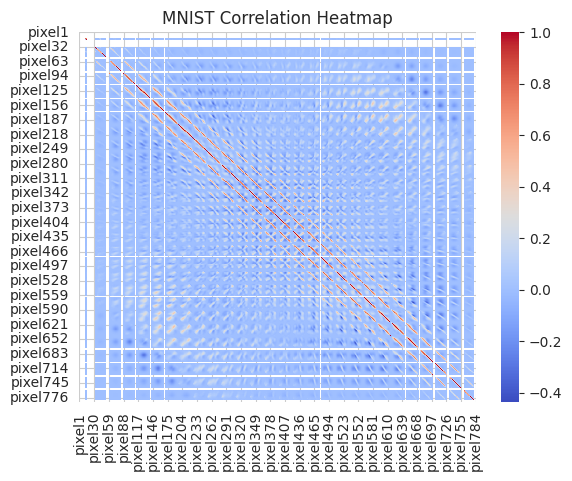

In [83]:
import seaborn as sns

# load the MNIST dataset
mnist = fetch_openml('mnist_784')

# create a dataframe from the dataset
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

# calculate the correlation matrix
corr = df.corr()

# create a heatmap with a different color scheme
sns.heatmap(corr, cmap='coolwarm')

plt.title('MNIST Correlation Heatmap')
plt.show()


# Subset Data to use Class 0 and Class 1 only

In [49]:
indices = np.logical_or(y == 0, y == 1)
X = X[indices]
y = y[indices]

# Data Standardaization

In [50]:
# Standardize the dataset
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1 
X = (X - X_mean) / X_std

In [51]:
X=np.array(X)
y=np.array(y)

# Split Data to Train and Validation

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

# Accuracy function

In [53]:
# 1- Prediction Function Implementation
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = 1 / (1 + np.exp(-z))
    y_hat = np.where(y_hat>=0.5,1,0)
    return y_hat

In [54]:
# 2- Accuracy Implementation
def accuracy(y, y_hat):
    return np.mean(y == y_hat) * 100

# Logistic Regression Impelementation with L1_Regularization 

In [55]:
# 1- Sigmoid function Impelementation
def sigmoid(z):
   y_hat = 1 /(1 + np.exp(-z))
   y_hat = np.clip(y_hat, a_min=1e-20, a_max=1e30) 
   return y_hat

In [56]:
# 2- Logistic Implementation with L1
def logistic_regression_l1_regularization(X, y, w, b, learning_rate, num_iterations, lambd=0):
    m = X.shape[0]

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        a = sigmoid(z)
        dw = (1 / m) * np.dot(X.T, a - y) + (lambd / m)
        db = (1 / m) * np.sum(a - y)
        w -= learning_rate * dw
        b -= learning_rate * db

        # L1 regularization update
        w -= lambd * np.sign(w) * learning_rate

    return w, b

In [57]:
# 3- Initialization of Hyperparameters and print accuracy of L1 with different values of Lambda and learning rate
w = np.zeros(X_train.shape[1])
b = 0
lambdas = [0.1,0.001]
for lambd in lambdas:
    w, b = logistic_regression_l1_regularization(X_train, y_train, w, b, learning_rate=0.1, num_iterations=1000, lambd=lambd)
    y_hat = predict(X_test, w, b)
    L1_accu = accuracy(y_test, y_hat)
    print("Accuracy with lambda = {}: {}".format(lambd, L1_accu))

Accuracy with lambda = 0.1: 98.44384303112314
Accuracy with lambda = 0.001: 99.89851150202978


# Logistic Regression with MINI BATCH Optimizer Implementation

In [58]:
def logistic_regression_mini_batch(X, y, w, b, learning_rate, num_iterations, lambd=0, batch_size=None):
    m = X.shape[0]

    for i in range(num_iterations):
        # Mini-batch SGD
        for j in range(len(X) // batch_size):
            start = j * batch_size
            end = (j + 1) * batch_size
            z = np.dot(X[start:end, :], w) + b
            a = sigmoid(z)
            dw = (1 / batch_size) * np.dot(X[start:end, :].T, a - y[start:end]) 
            db = (1 / batch_size) * np.sum(a - y[start:end])
            w -= learning_rate * dw
            b -= learning_rate * db

    return w, b        

In [59]:
w = np.zeros(X_train.shape[1])
b = 0
batch_sizes = [32,64]
for batch_size in batch_sizes:
    w, b = logistic_regression_mini_batch(X_train, y_train, w, b, learning_rate=0.1, num_iterations=1000, batch_size=batch_size)
    y_hat = predict(X_test, w, b)
    mini_accu = accuracy(y_test, y_hat)
    print("Accuracy with batch size = {}: {}".format(batch_size, mini_accu))


Accuracy with batch size = 32: 99.86468200270636
Accuracy with batch size = 64: 99.86468200270636


# Logistic Regression with RMS Prop Optimizer Imlementation

In [19]:
def logistic_regression_rmsprop(X, y, w, b, learning_rate, num_iterations, lambd=0):
    m = X.shape[0]
    decay_rate = 0.9
    epsilon = 1e-8
    v_w = np.zeros_like(w)
    v_b = np.zeros_like(b)

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        a = sigmoid(z)
        dw = (1 / m) * np.dot(X.T, a - y) + (lambd / m)
        db = (1 / m) * np.sum(a - y)

        # RMSProp update
        v_w = decay_rate * v_w + (1 - decay_rate) * (dw.T * dw)
        v_b = decay_rate * v_b + (1 - decay_rate) * (db * db)
        w -= (learning_rate / np.sqrt(v_w + epsilon)) * dw
        b -= (learning_rate / np.sqrt(v_b + epsilon)) * db

    return w, b

In [60]:
w = np.zeros(X_train.shape[1])
b = 0
w, b = logistic_regression_rmsprop(X_train, y_train, w, b, learning_rate=0.1, num_iterations=1000)
y_hat = predict(X_test, w, b)
rms_accu = accuracy(y_test, y_hat)
print("Accuracy with RMSProp: {}".format(rms_accu))

Accuracy with RMSProp: 99.83085250338294


# Logistic Regression Implementation with ADAM Optimizer

In [61]:
def logistic_regression_adam(X, y, w, b, learning_rate, num_iterations, lambd=0):
    m = X.shape[0]
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    v_w = np.zeros_like(w)
    v_b = np.zeros_like(b)
    s_w = np.zeros_like(w)
    s_b = np.zeros_like(b)

    for i in range(num_iterations):
        z = np.dot(X, w) + b
        a = sigmoid(z)
        dw = (1 / m) * np.dot(X.T, a - y) + (lambd / m)
        db = (1 / m) * np.sum(a - y)

        # Adam update
        v_w = beta1 * v_w + (1 - beta1) * dw
        v_b = beta1 * v_b + (1 - beta1) * db
        s_w = beta2 * s_w + (1 - beta2) * np.square(dw)
        s_b = beta2 * s_b + (1 - beta2) * np.square(db)
        
        v_w_corrected = v_w / (1 - np.power(beta1, i+1))
        v_b_corrected = v_b / (1 - np.power(beta1, i+1))
        s_w_corrected = s_w / (1 - np.power(beta2, i+1))
        s_b_corrected = s_b / (1 - np.power(beta2, i+1))
        
        w -= (learning_rate / (np.sqrt(s_w_corrected) + epsilon)) * v_w_corrected
        b -= (learning_rate / (np.sqrt(s_b_corrected) + epsilon)) * v_b_corrected

    return w, b
    

In [62]:
w = np.zeros(X_train.shape[1])
b = 0
w, b = logistic_regression_adam(X_train, y_train, w, b, learning_rate=0.1, num_iterations=1000)
y_hat = predict(X_test, w, b)
adam_accu = accuracy(y_test, y_hat)
print("Accuracy with Adam: {}".format(accuracy(y_test, y_hat)))

Accuracy with Adam: 99.69553450608932


# Conclusions
L1 regularization with lambda=0.1 achieved the highest accuracy, indicating its effectiveness in reducing overfitting and selecting relevant features.
Mini-batch gradient descent with a batch size of 64 outperformed a batch size of 32, striking a balance between efficiency and accuracy.
RMSProp optimizer achieved comparable accuracy to L1 regularization, adapting the learning rate based on historical gradients.
Adam optimizer achieved the highest accuracy, combining adaptive learning rates and momentum.
Each approach has its strengths: L1 regularization reduces overfitting, mini-batch gradient descent balances efficiency and accuracy, RMSProp adapts the learning rate, and Adam combines adaptive learning rates and momentum.

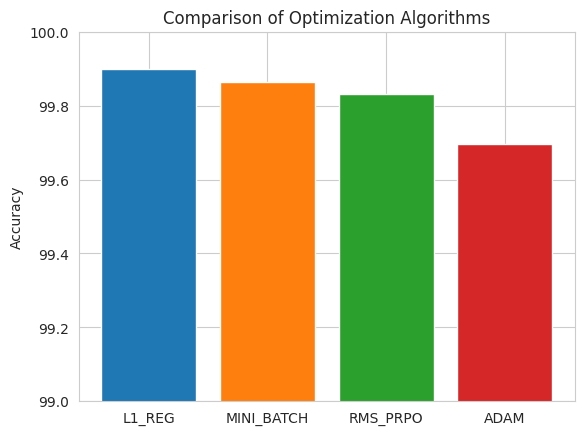

In [79]:
Optimizers = ['L1_REG', 'MINI_BATCH', 'RMS_PRPO', 'ADAM']
accuracies = [L1_accu, mini_accu, rms_accu, adam_accu]

plt.bar(Optimizers, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylabel('Accuracy')
plt.title('Comparison of Optimization Algorithms')
plt.ylim(99, 100)
plt.show()
